In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

## Table of Contents:
1. [Exploratory Data Analysis](#eda)
2. [Correlation and Model Prep](#correlation-and-model-prep)
3. [Modeling](#modeling)
4. [Confusion Matrix and Evaluation](#confusion-matrix-and-evaluation)
5. [Conclusion and Next Steps](#conclusion-and-next-steps)

# 1. Exploratory Data Analysis
<a id="eda"></a>

In [160]:
pgadata = pd.read_csv("golf_raw.csv")


In [161]:
pgadata.head()

,tour,year,season,event_completed,event_name,player_name,dg_id,fin_text,round_num,course_name,...,sg_t2g,sg_total,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots
0,pga,2023,2023,3/12/2023,THE PLAYERS Championship,"Hoge, Tom",15575,T3,3,TPC Sawgrass (THE PLAYERS Stadium Course),...,5.139,7.573,278.8,0.786,0.889,1.000,50.571,21.302,6.0,2.0
1,pga,2020,2021,9/20/2020,U.S. Open,"Kang, Sung",7881,CUT,2,Winged Foot GC,...,-8.322,-10.748,269.5,0.500,0.167,0.333,101.289,48.487,1.0,15.0
2,pga,2020,2020,3/15/2020,THE PLAYERS Championship,"Matsuyama, Hideki",13562,1,1,TPC Sawgrass,...,4.029,8.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pga,2022,2022,3/13/2022,THE PLAYERS Championship,"Johnson, Dustin",12422,T9,4,TPC Sawgrass,...,3.883,8.571,295.5,0.714,0.833,0.667,42.105,21.992,7.0,1.0
4,pga,2024,2024,5/19/2024,PGA Championship,"Schauffele, Xander",19895,1,1,Valhalla Golf Club,...,5.116,9.276,299.6,0.857,0.778,0.857,52.667,32.530,7.0,0.0


In [162]:
df1 = pgadata.loc[(pgadata['round_num']==1) | (pgadata['round_num']==2), :]

In [163]:
df1.head()

,tour,year,season,event_completed,event_name,player_name,dg_id,fin_text,round_num,course_name,...,sg_t2g,sg_total,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots
1,pga,2020,2021,9/20/2020,U.S. Open,"Kang, Sung",7881,CUT,2,Winged Foot GC,...,-8.322,-10.748,269.5,0.500,0.167,0.333,101.289,48.487,1.0,15.0
2,pga,2020,2020,3/15/2020,THE PLAYERS Championship,"Matsuyama, Hideki",13562,1,1,TPC Sawgrass,...,4.029,8.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pga,2024,2024,5/19/2024,PGA Championship,"Schauffele, Xander",19895,1,1,Valhalla Golf Club,...,5.116,9.276,299.6,0.857,0.778,0.857,52.667,32.530,7.0,0.0
9,pga,2022,2022,7/17/2022,The Open Championship,"Smith, Cameron",15856,1,2,St. Andrews Links (Old Course),...,1.529,7.724,284.4,0.750,0.889,0.667,60.480,36.038,9.0,1.0
11,pga,2022,2022,7/17/2022,The Open Championship,"Young, Cameron",26651,2,1,St. Andrews Links (Old Course),...,6.841,8.699,323.1,0.500,1.000,1.000,42.925,24.445,7.0,3.0


In [164]:
df1['round_num'].value_counts()

round_num
1    5133
2    4962
Name: count, dtype: int64

In [165]:
df1['fin_text'].value_counts()

fin_text
CUT    4812
T35     152
T41     126
T23     124
T22     123
       ... 
33        2
23        2
46        2
22        2
139       1
Name: count, Length: 151, dtype: int64

In [166]:
df1['made_weekend'] = np.where((df1['fin_text'] == 'CUT') | (df1['fin_text'] == 'DQ') | (df1['fin_text'] == 'WD'), 0, 1)

/var/folders/c_/r__ycd6n73xg580m_mtq54gr0000gn/T/ipykernel_16771/1744062699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['made_weekend'] = np.where((df1['fin_text'] == 'CUT') | (df1['fin_text'] == 'DQ') | (df1['fin_text'] == 'WD'), 0, 1)


In [167]:
df1.head()

,tour,year,season,event_completed,event_name,player_name,dg_id,fin_text,round_num,course_name,...,sg_total,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots,made_weekend
1,pga,2020,2021,9/20/2020,U.S. Open,"Kang, Sung",7881,CUT,2,Winged Foot GC,...,-10.748,269.5,0.500,0.167,0.333,101.289,48.487,1.0,15.0,0
2,pga,2020,2020,3/15/2020,THE PLAYERS Championship,"Matsuyama, Hideki",13562,1,1,TPC Sawgrass,...,8.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,pga,2024,2024,5/19/2024,PGA Championship,"Schauffele, Xander",19895,1,1,Valhalla Golf Club,...,9.276,299.6,0.857,0.778,0.857,52.667,32.530,7.0,0.0,1
9,pga,2022,2022,7/17/2022,The Open Championship,"Smith, Cameron",15856,1,2,St. Andrews Links (Old Course),...,7.724,284.4,0.750,0.889,0.667,60.480,36.038,9.0,1.0,1
11,pga,2022,2022,7/17/2022,The Open Championship,"Young, Cameron",26651,2,1,St. Andrews Links (Old Course),...,8.699,323.1,0.500,1.000,1.000,42.925,24.445,7.0,3.0,1


In [168]:
df1['event_name'].value_counts()

event_name
PGA Championship            2485
THE PLAYERS Championship    2163
U.S. Open                   2157
The Open Championship       1870
Masters Tournament          1420
Name: count, dtype: int64

In [169]:
# replace Masters to address duplicate tournament entries
df1['event_name'] = df1['event_name'].replace('The Masters', 'Masters Tournament')

/var/folders/c_/r__ycd6n73xg580m_mtq54gr0000gn/T/ipykernel_16771/3603521349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['event_name'] = df1['event_name'].replace('The Masters', 'Masters Tournament')


In [170]:
# sanity check
df1['event_name'].value_counts()

event_name
PGA Championship            2485
THE PLAYERS Championship    2163
U.S. Open                   2157
The Open Championship       1870
Masters Tournament          1420
Name: count, dtype: int64

In [171]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10095 entries, 1 to 15168
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tour             10095 non-null  object 
 1   year             10095 non-null  int64  
 2   season           10095 non-null  int64  
 3   event_completed  10095 non-null  object 
 4   event_name       10095 non-null  object 
 5   player_name      10095 non-null  object 
 6   dg_id            10095 non-null  int64  
 7   fin_text         10095 non-null  object 
 8   round_num        10095 non-null  int64  
 9   course_name      10095 non-null  object 
 10  course_num       10095 non-null  int64  
 11  course_par       10095 non-null  int64  
 12  start_hole       10095 non-null  int64  
 13  teetime          10095 non-null  object 
 14  round_score      10095 non-null  int64  
 15  score to par     10095 non-null  int64  
 16  sg_putt          7507 non-null   float64
 17  sg_arg           

In [172]:
# start by dropping 'tour' column since all of the tournaments in my scope are in the same tour (PGA)

df1.drop(columns = 'tour', inplace = True)

/var/folders/c_/r__ycd6n73xg580m_mtq54gr0000gn/T/ipykernel_16771/4047165285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns = 'tour', inplace = True)


In [173]:
# drop player_name since names are stored/mapped numerically under dg_id
df1.drop(columns = 'player_name', inplace = True)

/var/folders/c_/r__ycd6n73xg580m_mtq54gr0000gn/T/ipykernel_16771/2763266898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns = 'player_name', inplace = True)


In [174]:
# drop course_name since names are stored/mapped numerically under course_num
df1.drop(columns = 'course_name', inplace = True)

/var/folders/c_/r__ycd6n73xg580m_mtq54gr0000gn/T/ipykernel_16771/1719642872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns = 'course_name', inplace = True)


In [175]:
df1['event_name'].value_counts()

event_name
PGA Championship            2485
THE PLAYERS Championship    2163
U.S. Open                   2157
The Open Championship       1870
Masters Tournament          1420
Name: count, dtype: int64

In [176]:
# Create dummy columns for the 'event_name' column
dummies = pd.get_dummies(df1['event_name'], prefix='event')

# Concatenate the dummy columns with the original DataFrame
df1 = pd.concat([df1, dummies], axis=1)

# Drop the original 'event_name' column
df1.drop('event_name', axis=1, inplace=True)

In [177]:
# sanity check
df1.head()

,year,season,event_completed,dg_id,fin_text,round_num,course_num,course_par,start_hole,teetime,...,prox_rgh,prox_fw,great_shots,poor_shots,made_weekend,event_Masters Tournament,event_PGA Championship,event_THE PLAYERS Championship,event_The Open Championship,event_U.S. Open
1,2020,2021,9/20/2020,7881,CUT,2,891,70,10,12:32 PM,...,101.289,48.487,1.0,15.0,0,False,False,False,False,True
2,2020,2020,3/15/2020,13562,1,1,11,72,10,8:24 AM,...,NaN,NaN,NaN,NaN,1,False,False,True,False,False
4,2024,2024,5/19/2024,19895,1,1,671,71,10,8:03 AM,...,52.667,32.530,7.0,0.0,1,False,True,False,False,False
9,2022,2022,7/17/2022,15856,1,2,668,72,1,1:04 PM,...,60.480,36.038,9.0,1.0,1,False,False,False,True,False
11,2022,2022,7/17/2022,26651,2,1,668,72,1,8:25 AM,...,42.925,24.445,7.0,3.0,1,False,False,False,True,False


In [178]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10095 entries, 1 to 15168
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            10095 non-null  int64  
 1   season                          10095 non-null  int64  
 2   event_completed                 10095 non-null  object 
 3   dg_id                           10095 non-null  int64  
 4   fin_text                        10095 non-null  object 
 5   round_num                       10095 non-null  int64  
 6   course_num                      10095 non-null  int64  
 7   course_par                      10095 non-null  int64  
 8   start_hole                      10095 non-null  int64  
 9   teetime                         10095 non-null  object 
 10  round_score                     10095 non-null  int64  
 11  score to par                    10095 non-null  int64  
 12  sg_putt                         7507 

In [179]:
# convert time to integer
def normalize_time_format(time_str):
    return re.sub(r'(\d+:\d+)([ap]m)', r'\1 \2', time_str)

def time_to_minutes(time_str):
    time_str = normalize_time_format(time_str)
    time_obj = pd.to_datetime(time_str, format='%I:%M %p')
    return time_obj.hour * 60 + time_obj.minute

In [180]:
df1['teetime_int'] = df1['teetime'].apply(time_to_minutes)

In [181]:
df1.head()

,year,season,event_completed,dg_id,fin_text,round_num,course_num,course_par,start_hole,teetime,...,prox_fw,great_shots,poor_shots,made_weekend,event_Masters Tournament,event_PGA Championship,event_THE PLAYERS Championship,event_The Open Championship,event_U.S. Open,teetime_int
1,2020,2021,9/20/2020,7881,CUT,2,891,70,10,12:32 PM,...,48.487,1.0,15.0,0,False,False,False,False,True,752
2,2020,2020,3/15/2020,13562,1,1,11,72,10,8:24 AM,...,NaN,NaN,NaN,1,False,False,True,False,False,504
4,2024,2024,5/19/2024,19895,1,1,671,71,10,8:03 AM,...,32.530,7.0,0.0,1,False,True,False,False,False,483
9,2022,2022,7/17/2022,15856,1,2,668,72,1,1:04 PM,...,36.038,9.0,1.0,1,False,False,False,True,False,784
11,2022,2022,7/17/2022,26651,2,1,668,72,1,8:25 AM,...,24.445,7.0,3.0,1,False,False,False,True,False,505


In [182]:
# Define bins and labels
bins = [0, 600, 720, float('inf')]
labels = [1, 2, 3] # 1 for 480-600 or 8AM-10AM, 2 for 601-720 or 10AM-12PM, 3 for anything greater than 721 or anytime after 12PM

# Create the tee_time_of_day column using pd.cut
df1['tee_time_of_day'] = pd.cut(df1['teetime_int'], bins=bins, labels=labels, right=False)

df1['tee_time_of_day_int'] = df1['tee_time_of_day'].cat.codes + 1  # Adding 1 to match the labels

In [183]:
# drop teetime since it was mapped in teetime_int and grouped in tee_time_of_day
df1.drop(columns = 'teetime', inplace = True)

In [184]:
# drop tee_time_of_day since it was converted to int in another column
df1.drop(columns = 'tee_time_of_day', inplace = True)

In [185]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10095 entries, 1 to 15168
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            10095 non-null  int64  
 1   season                          10095 non-null  int64  
 2   event_completed                 10095 non-null  object 
 3   dg_id                           10095 non-null  int64  
 4   fin_text                        10095 non-null  object 
 5   round_num                       10095 non-null  int64  
 6   course_num                      10095 non-null  int64  
 7   course_par                      10095 non-null  int64  
 8   start_hole                      10095 non-null  int64  
 9   round_score                     10095 non-null  int64  
 10  score to par                    10095 non-null  int64  
 11  sg_putt                         7507 non-null   float64
 12  sg_arg                          7507 

In [186]:
# drop event_completed since granular date of round is not needed for analysis
df1.drop(columns = 'event_completed', inplace = True)

In [187]:
# drop season since granular year of round is not needed for analysis
df1.drop(columns = 'season', inplace = True)

In [188]:
# ensure all columns have been converted to int dtype
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10095 entries, 1 to 15168
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            10095 non-null  int64  
 1   dg_id                           10095 non-null  int64  
 2   fin_text                        10095 non-null  object 
 3   round_num                       10095 non-null  int64  
 4   course_num                      10095 non-null  int64  
 5   course_par                      10095 non-null  int64  
 6   start_hole                      10095 non-null  int64  
 7   round_score                     10095 non-null  int64  
 8   score to par                    10095 non-null  int64  
 9   sg_putt                         7507 non-null   float64
 10  sg_arg                          7507 non-null   float64
 11  sg_app                          7507 non-null   float64
 12  sg_ott                          7507 

In [189]:
# drop fin_text since placement is not needed for this step and mapping was done in 
# made_weekend
df1.drop(columns = 'fin_text', inplace = True)

In [190]:
df1.head()

,year,dg_id,round_num,course_num,course_par,start_hole,round_score,score to par,sg_putt,sg_arg,...,great_shots,poor_shots,made_weekend,event_Masters Tournament,event_PGA Championship,event_THE PLAYERS Championship,event_The Open Championship,event_U.S. Open,teetime_int,tee_time_of_day_int
1,2020,7881,2,891,70,10,86,16,-2.426,-0.138,...,1.0,15.0,0,False,False,False,False,True,752,3
2,2020,13562,1,11,72,10,63,-9,4.276,0.345,...,NaN,NaN,1,False,False,True,False,False,504,1
4,2024,19895,1,671,71,10,62,-9,4.160,1.307,...,7.0,0.0,1,False,True,False,False,False,483,1
9,2022,15856,2,668,72,1,64,-8,6.195,0.529,...,9.0,1.0,1,False,False,False,True,False,784,3
11,2022,26651,1,668,72,1,64,-8,1.858,2.213,...,7.0,3.0,1,False,False,False,True,False,505,1


In [191]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10095 entries, 1 to 15168
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            10095 non-null  int64  
 1   dg_id                           10095 non-null  int64  
 2   round_num                       10095 non-null  int64  
 3   course_num                      10095 non-null  int64  
 4   course_par                      10095 non-null  int64  
 5   start_hole                      10095 non-null  int64  
 6   round_score                     10095 non-null  int64  
 7   score to par                    10095 non-null  int64  
 8   sg_putt                         7507 non-null   float64
 9   sg_arg                          7507 non-null   float64
 10  sg_app                          7507 non-null   float64
 11  sg_ott                          7507 non-null   float64
 12  sg_t2g                          7507 

In [192]:
display(df1['round_score'].describe())

count    10095.000000
mean        72.778306
std          3.497003
min         62.000000
25%         70.000000
50%         73.000000
75%         75.000000
max         92.000000
Name: round_score, dtype: float64

In [193]:
display(df1['score to par'].describe())

count    10095.000000
mean         1.668053
std          3.546329
min         -9.000000
25%         -1.000000
50%          1.000000
75%          4.000000
max         22.000000
Name: score to par, dtype: float64

In [194]:
score_to_par_avg = df1['score to par'].mean()
score_to_par_avg

1.6680534918276375

In [195]:
score_to_par_std = df1['score to par'].std()
score_to_par_std

3.5463285425176823

* Since data has been cleaned, it's time to start correlation checking and model prep

# 2. Correlation and Model Prep
<a id="correlation-and-model-prep"></a>

In [196]:
# checking correlations
corr_coef = df1.corr()
corr_coef.style.background_gradient()

,year,dg_id,round_num,course_num,course_par,start_hole,round_score,score to par,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots,made_weekend,event_Masters Tournament,event_PGA Championship,event_THE PLAYERS Championship,event_The Open Championship,event_U.S. Open,teetime_int,tee_time_of_day_int
year,1.000000,0.011718,0.001913,-0.018800,0.028053,0.011930,-0.042288,-0.048652,0.001516,-0.001792,0.000176,0.000560,-0.000453,0.000000,0.208964,0.012523,-0.008822,0.013081,0.035200,0.117335,0.036136,0.023016,-0.006307,0.031227,0.050039,0.053326,-0.064941,-0.070904,0.050737,0.020382
dg_id,0.011718,1.000000,0.000366,0.022948,-0.021186,0.006098,0.012091,0.017174,-0.011045,-0.000817,-0.016647,-0.019496,-0.020113,-0.020195,-0.013785,-0.027128,-0.019968,0.000044,-0.003009,0.002913,-0.016815,0.005933,-0.016428,-0.009163,0.024809,-0.008977,-0.007551,-0.002158,-0.002358,-0.000018
round_num,0.001913,0.000366,1.000000,0.017285,-0.015123,-0.004547,-0.012804,-0.008878,0.000694,-0.001567,0.000527,0.000080,-0.000305,0.000029,0.014404,-0.015621,-0.045902,0.025936,-0.005406,0.012680,0.023136,0.018930,-0.010745,0.005714,0.007611,-0.028096,0.007568,0.008106,-0.017729,-0.000808
course_num,-0.018800,0.022948,0.017285,1.000000,-0.678921,-0.022434,-0.024694,0.143899,0.002198,-0.005500,0.000176,0.000323,-0.002212,0.000000,0.114018,-0.240687,-0.143471,-0.057076,0.029603,-0.042056,0.062475,0.011733,-0.076580,-0.466093,0.372855,-0.606174,0.420545,0.211697,-0.014305,-0.006085
course_par,0.028053,-0.021186,-0.015123,-0.678921,1.000000,-0.070166,0.069136,-0.179644,-0.001655,0.004549,-0.000694,-0.000875,0.001338,0.000010,-0.168684,0.209705,0.161810,0.073225,-0.121093,0.145618,-0.003488,0.017100,0.085494,0.409624,-0.397994,0.528704,-0.150057,-0.316196,0.038490,0.011117
start_hole,0.011930,0.006098,-0.004547,-0.022434,-0.070166,1.000000,-0.011590,0.005960,-0.002604,0.001170,0.002283,-0.012381,-0.003573,-0.003254,-0.044080,-0.070347,-0.040954,0.025948,-0.015707,-0.123701,-0.029871,-0.006724,-0.019650,-0.240381,0.185705,0.168279,-0.346828,0.168996,-0.026100,-0.010004
round_score,-0.042288,0.012091,-0.012804,-0.024694,0.069136,-0.011590,1.000000,0.968958,-0.537982,-0.427967,-0.590598,-0.445060,-0.785877,-0.925525,-0.169041,-0.270744,-0.609398,-0.485022,0.137786,0.428922,-0.367471,0.659505,-0.561754,0.081056,-0.034399,-0.053539,-0.052022,0.070299,0.006309,0.008884
score to par,-0.048652,0.017174,-0.008878,0.143899,-0.179644,0.005960,0.968958,1.000000,-0.531108,-0.423964,-0.583331,-0.439496,-0.776773,-0.912654,-0.125233,-0.320543,-0.643497,-0.498540,0.166254,0.389237,-0.363232,0.649236,-0.575128,-0.021584,0.064710,-0.183817,-0.014112,0.147680,-0.003317,0.006006
sg_putt,0.001516,-0.011045,0.000694,0.002198,-0.001655,-0.002604,-0.537982,-0.531108,1.000000,0.027884,0.028052,0.028553,0.044218,0.576582,0.013103,0.001043,0.047419,0.436212,-0.013055,-0.017193,0.330907,-0.398130,0.329602,0.000006,-0.001000,-0.002110,-0.001009,0.004225,-0.046045,-0.047870
sg_arg,-0.001792,-0.000817,-0.001567,-0.005500,0.004549,0.001170,-0.427967,-0.423964,0.027884,1.000000,0.082128,0.061353,0.541524,0.457865,0.012728,0.034005,0.141964,0.480668,-0.006988,-0.051239,0.101483,-0.255898,0.272875,0.002860,0.002785,0.003701,0.001764,-0.010682,-0.011213,-0.012266


In [197]:
# Get the list of all column names
all_columns = df1.columns.tolist()

# Remove the target column from the list
all_columns.remove('round_score')

all_columns

['year',
 'dg_id',
 'round_num',
 'course_num',
 'course_par',
 'start_hole',
 'score to par',
 'sg_putt',
 'sg_arg',
 'sg_app',
 'sg_ott',
 'sg_t2g',
 'sg_total',
 'driving_dist',
 'driving_acc',
 'gir',
 'scrambling',
 'prox_rgh',
 'prox_fw',
 'great_shots',
 'poor_shots',
 'made_weekend',
 'event_Masters Tournament',
 'event_PGA Championship',
 'event_THE PLAYERS Championship',
 'event_The Open Championship',
 'event_U.S. Open',
 'teetime_int',
 'tee_time_of_day_int']

In [198]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10095 entries, 1 to 15168
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            10095 non-null  int64  
 1   dg_id                           10095 non-null  int64  
 2   round_num                       10095 non-null  int64  
 3   course_num                      10095 non-null  int64  
 4   course_par                      10095 non-null  int64  
 5   start_hole                      10095 non-null  int64  
 6   round_score                     10095 non-null  int64  
 7   score to par                    10095 non-null  int64  
 8   sg_putt                         7507 non-null   float64
 9   sg_arg                          7507 non-null   float64
 10  sg_app                          7507 non-null   float64
 11  sg_ott                          7507 non-null   float64
 12  sg_t2g                          7507 

In [199]:
X = df1[all_columns]
y = df1['round_score']
         

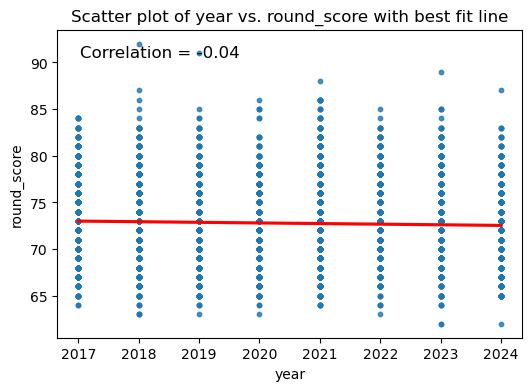

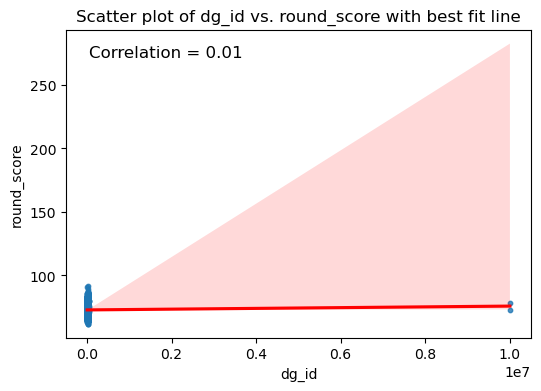

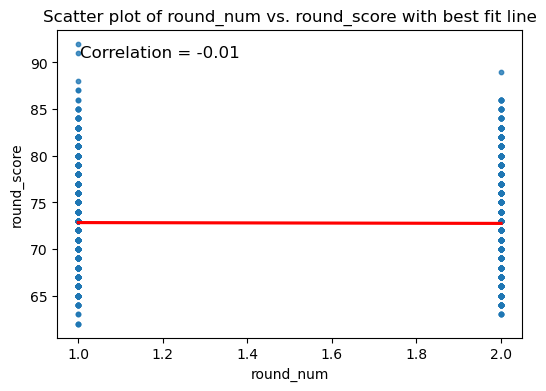

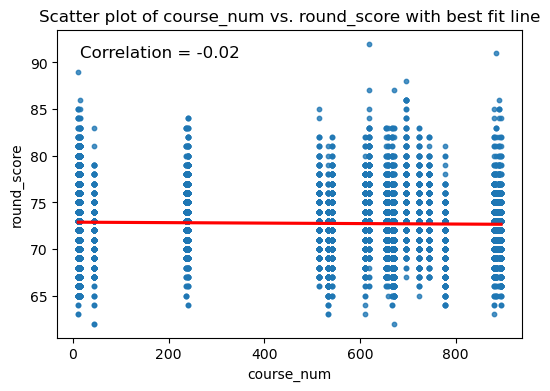

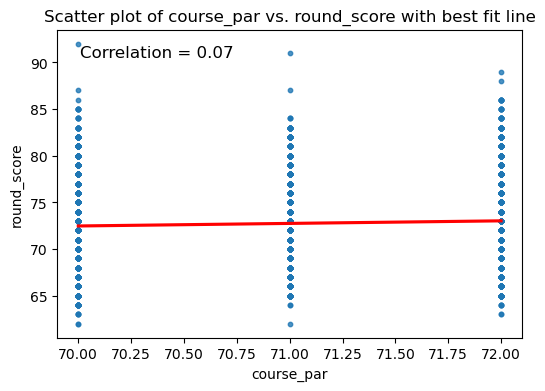

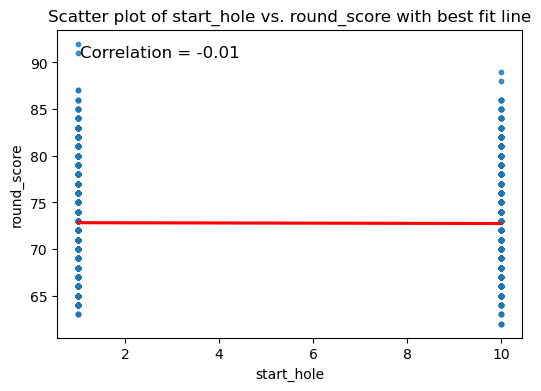

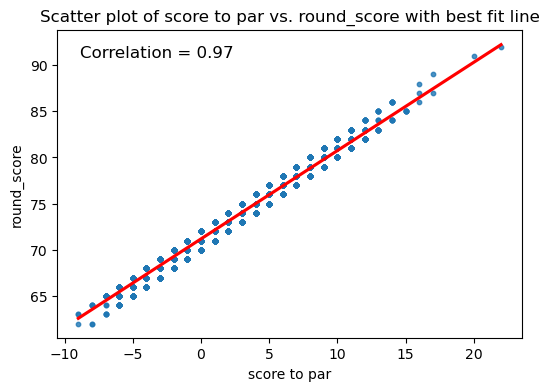

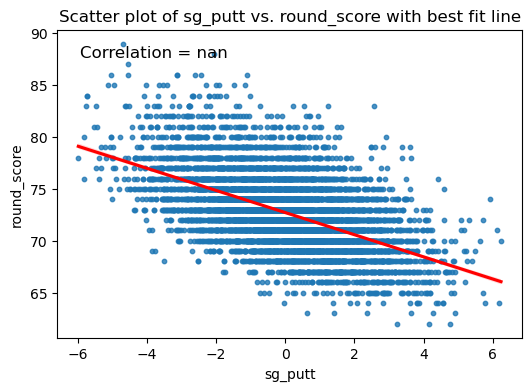

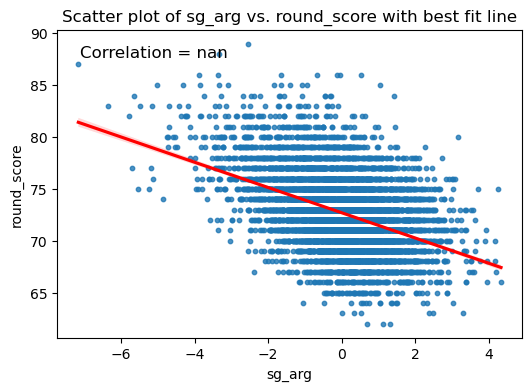

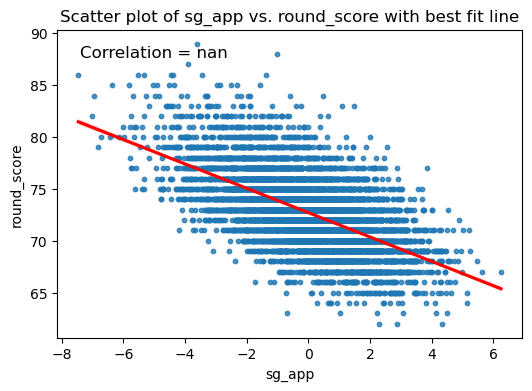

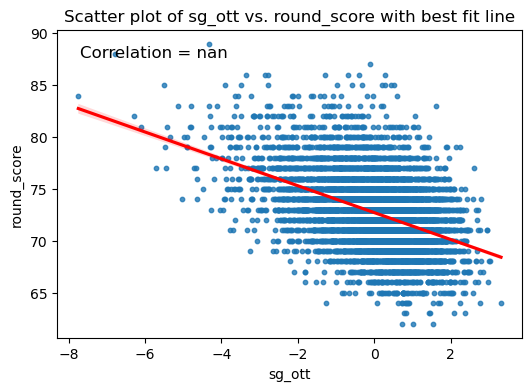

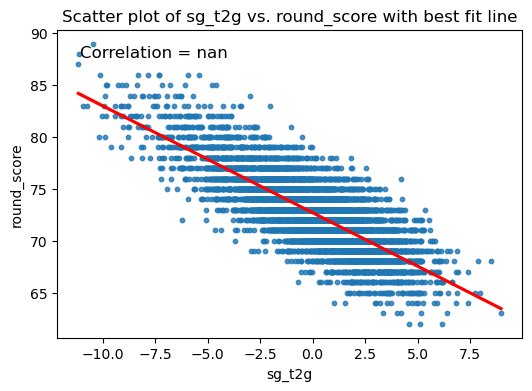

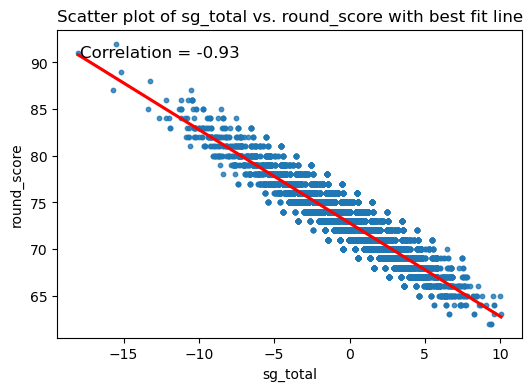

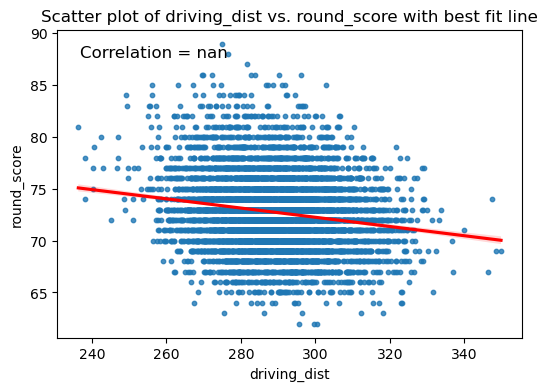

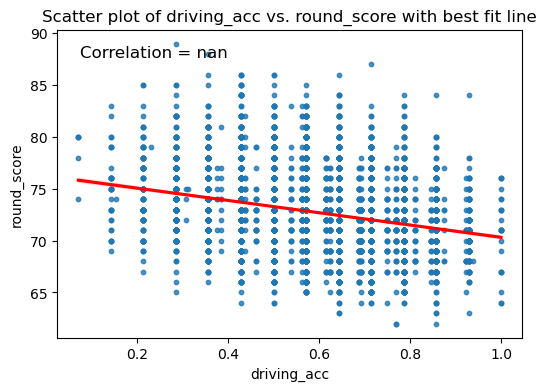

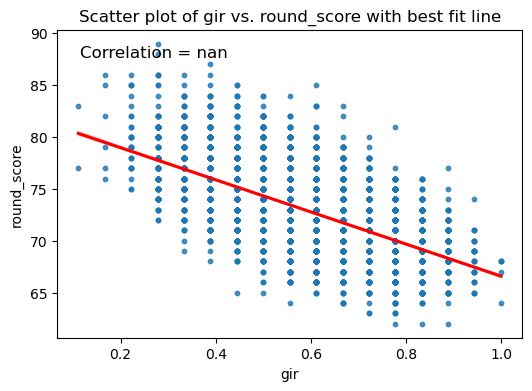

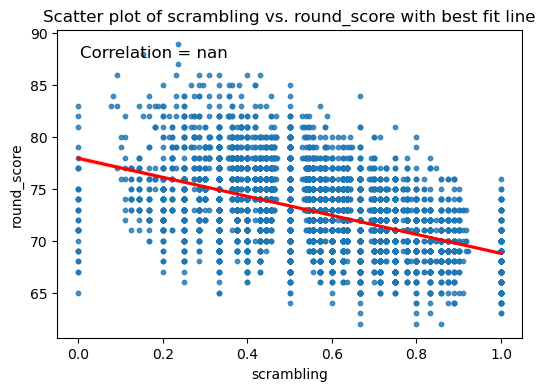

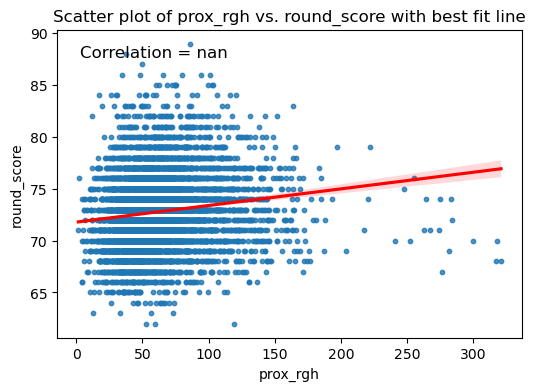

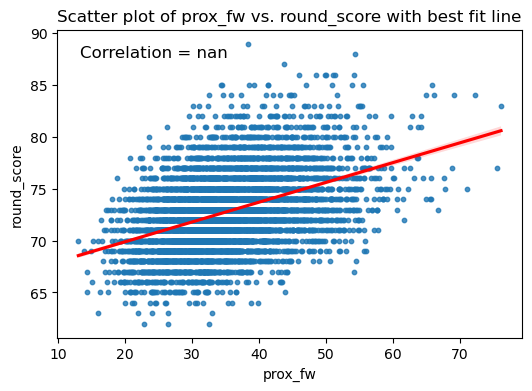

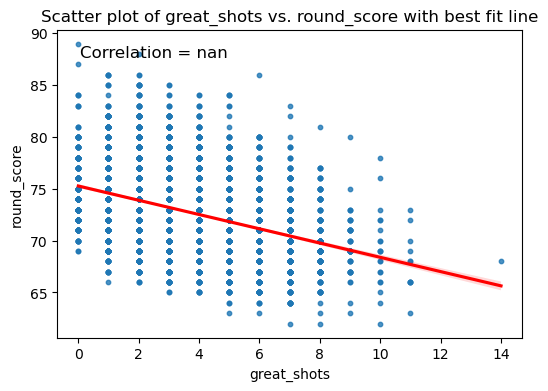

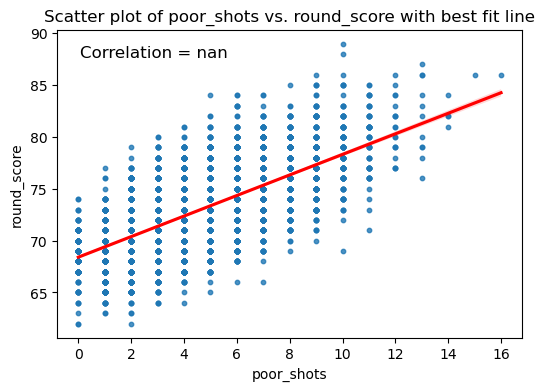

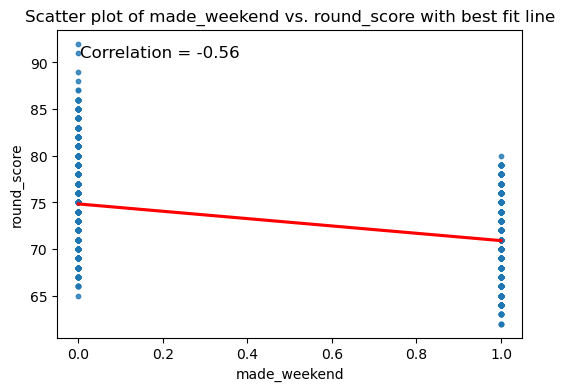

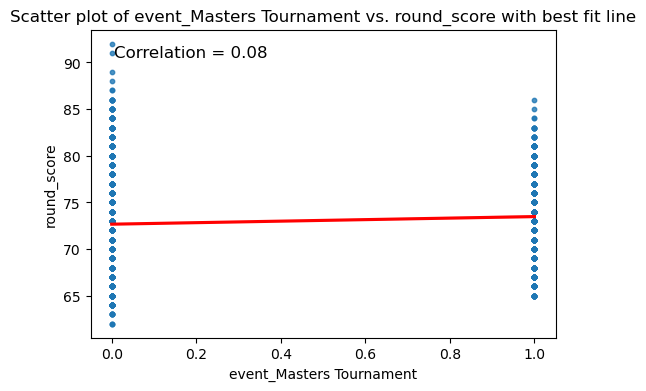

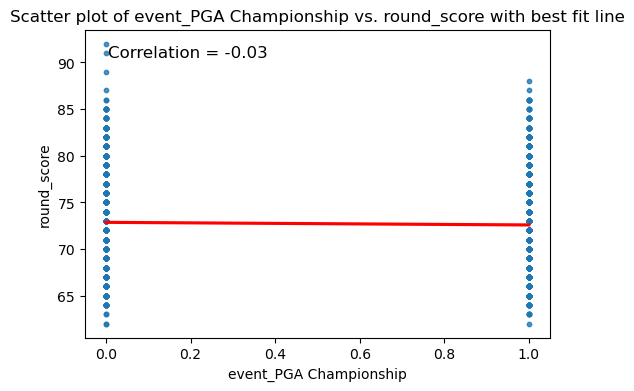

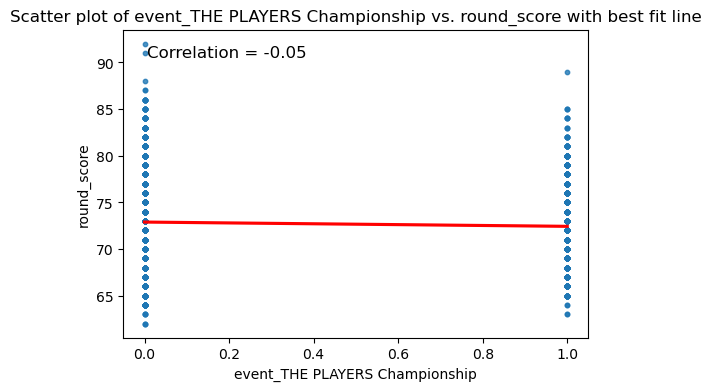

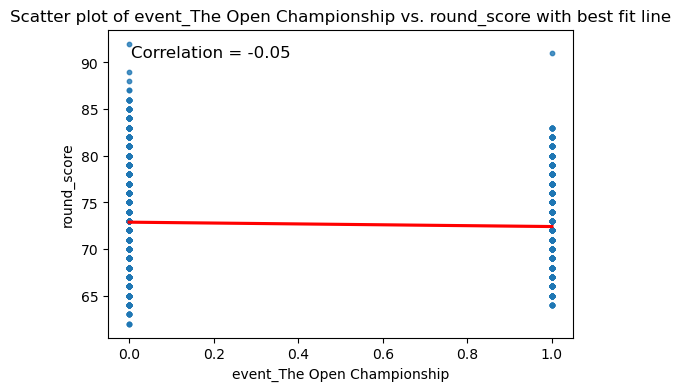

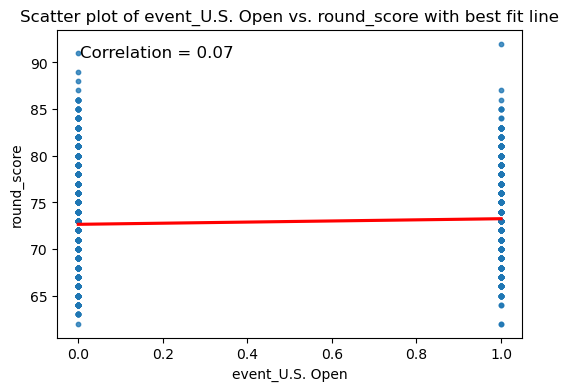

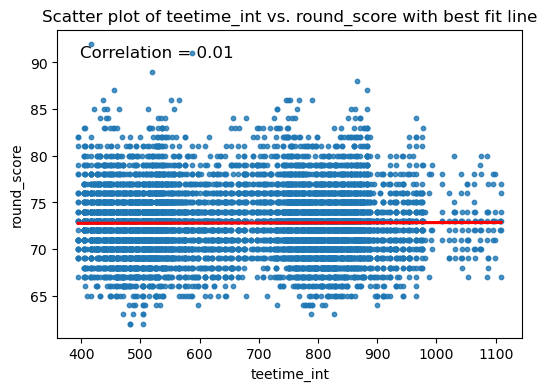

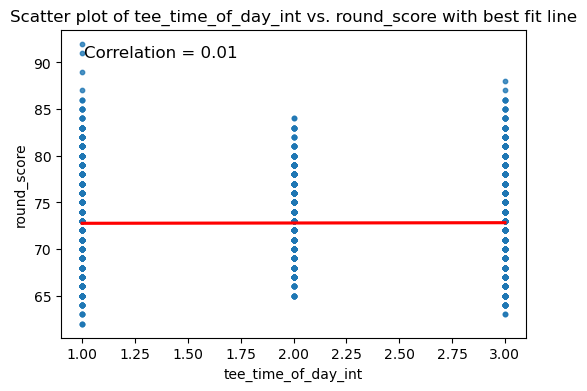

In [200]:
# plotting correlations with line of best fit and correlation value
for col in X.columns:
    plt.figure(figsize=(6, 4))
    
    # Calculate the correlation coefficient
    correlation = np.corrcoef(X[col], y)[0, 1]
    
    # Create the plot
    sns.regplot(x=X[col], y=y, scatter_kws={'s': 10}, line_kws={'color': 'red'})
    
    # Annotate the plot with the correlation value
    plt.text(0.05, 0.95, f'Correlation = {correlation:.2f}', transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top')
    
    plt.ylabel('round_score')
    plt.xlabel(col)
    plt.title(f'Scatter plot of {col} vs. round_score with best fit line')
    plt.show()

In [201]:
X.corr()

,year,dg_id,round_num,course_num,course_par,start_hole,score to par,sg_putt,sg_arg,sg_app,...,great_shots,poor_shots,made_weekend,event_Masters Tournament,event_PGA Championship,event_THE PLAYERS Championship,event_The Open Championship,event_U.S. Open,teetime_int,tee_time_of_day_int
year,1.000000e+00,0.011718,0.001913,-1.880026e-02,0.028053,0.011930,-0.048652,0.001516,-0.001792,0.000176,...,0.036136,0.023016,-0.006307,0.031227,5.003870e-02,0.053326,-0.064941,-0.070904,0.050737,0.020382
dg_id,1.171778e-02,1.000000,0.000366,2.294778e-02,-0.021186,0.006098,0.017174,-0.011045,-0.000817,-0.016647,...,-0.016815,0.005933,-0.016428,-0.009163,2.480947e-02,-0.008977,-0.007551,-0.002158,-0.002358,-0.000018
round_num,1.913067e-03,0.000366,1.000000,1.728531e-02,-0.015123,-0.004547,-0.008878,0.000694,-0.001567,0.000527,...,0.023136,0.018930,-0.010745,0.005714,7.611162e-03,-0.028096,0.007568,0.008106,-0.017729,-0.000808
course_num,-1.880026e-02,0.022948,0.017285,1.000000e+00,-0.678921,-0.022434,0.143899,0.002198,-0.005500,0.000176,...,0.062475,0.011733,-0.076580,-0.466093,3.728551e-01,-0.606174,0.420545,0.211697,-0.014305,-0.006085
course_par,2.805348e-02,-0.021186,-0.015123,-6.789206e-01,1.000000,-0.070166,-0.179644,-0.001655,0.004549,-0.000694,...,-0.003488,0.017100,0.085494,0.409624,-3.979940e-01,0.528704,-0.150057,-0.316196,0.038490,0.011117
start_hole,1.193031e-02,0.006098,-0.004547,-2.243363e-02,-0.070166,1.000000,0.005960,-0.002604,0.001170,0.002283,...,-0.029871,-0.006724,-0.019650,-0.240381,1.857050e-01,0.168279,-0.346828,0.168996,-0.026100,-0.010004
score to par,-4.865230e-02,0.017174,-0.008878,1.438985e-01,-0.179644,0.005960,1.000000,-0.531108,-0.423964,-0.583331,...,-0.363232,0.649236,-0.575128,-0.021584,6.470956e-02,-0.183817,-0.014112,0.147680,-0.003317,0.006006
sg_putt,1.516432e-03,-0.011045,0.000694,2.197728e-03,-0.001655,-0.002604,-0.531108,1.000000,0.027884,0.028052,...,0.330907,-0.398130,0.329602,0.000006,-1.000238e-03,-0.002110,-0.001009,0.004225,-0.046045,-0.047870
sg_arg,-1.792163e-03,-0.000817,-0.001567,-5.499529e-03,0.004549,0.001170,-0.423964,0.027884,1.000000,0.082128,...,0.101483,-0.255898,0.272875,0.002860,2.785179e-03,0.003701,0.001764,-0.010682,-0.011213,-0.012266
sg_app,1.755401e-04,-0.016647,0.000527,1.759625e-04,-0.000694,0.002283,-0.583331,0.028052,0.082128,1.000000,...,0.263163,-0.387822,0.385385,0.000699,-1.387016e-03,-0.000539,-0.000266,0.001903,-0.016564,-0.020724


In [202]:
# Check the correlation of sg_total with round_score
correlation_with_target = df1[['sg_total', 'round_score']].corr()
print(correlation_with_target)


             sg_total  round_score
sg_total     1.000000    -0.925525
round_score -0.925525     1.000000


In [203]:
# Compute the correlation matrix
corr_matrix = df1.corr()

# Get the correlation of each feature with the target 'round_score'
target_corr = corr_matrix['round_score'].sort_values(ascending=False)
print(target_corr)

# If needed, get pairs of features with high correlation
high_corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
print(high_corr_pairs)

round_score                       1.000000
score to par                      0.968958
poor_shots                        0.659505
prox_fw                           0.428922
prox_rgh                          0.137786
event_Masters Tournament          0.081056
event_U.S. Open                   0.070299
course_par                        0.069136
dg_id                             0.012091
tee_time_of_day_int               0.008884
teetime_int                       0.006309
start_hole                       -0.011590
round_num                        -0.012804
course_num                       -0.024694
event_PGA Championship           -0.034399
year                             -0.042288
event_The Open Championship      -0.052022
event_THE PLAYERS Championship   -0.053539
driving_dist                     -0.169041
driving_acc                      -0.270744
great_shots                      -0.367471
sg_arg                           -0.427967
sg_ott                           -0.445060
scrambling 

Looking at these correlations, there are a couple that stick out to me from my existing knowledge of the game
* The sg metrics are all very closely tied to a golfer's score so strong negative correlations were to be expected
* The Masters and U.S. Open are historically a much more competitive field and as a result, also have higher scores on average and so them being the two tournaments with a positive correlation with round_score is very logical
* I was originally interested to see if tee-time was a significant factor of sorts for players but I think the professionalism of players allows for strong performances, whether they are starting at 7am in one of the earlier groups or at 2pm in the later groups
* While not as strong or significant, I see the -0.04 correlation of year with round_score an indicator of the game overall becoming more competitive and golfers performing better

# 3. Modeling
<a id="modeling"></a>

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Step 1: Drop highly correlated features if they exist
columns_to_drop = ['score to par', 'sg_total']
df1_cleaned = df1.drop(columns=[col for col in columns_to_drop if col in df1.columns])

# Step 2: Encode categorical variables
df_encoded = pd.get_dummies(df1_cleaned, drop_first=False)

# Identify expected tournament dummy variables
expected_event_columns = ['event_Masters Tournament', 'event_PGA Championship', 'event_THE PLAYERS Championship', 
                          'event_The Open Championship', 'event_U.S. Open']

# Ensure all expected event columns are present
for col in expected_event_columns:
    if col not in df_encoded.columns:
        df_encoded[col] = 0

# Step 3: Prepare the data
X = df_encoded.drop('round_score', axis=1)
y = df_encoded['round_score']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the test set has the same columns as the training set
missing_columns_train = set(X_train.columns) - set(X_test.columns)
missing_columns_test = set(X_test.columns) - set(X_train.columns)

for col in missing_columns_train:
    X_test[col] = 0

for col in missing_columns_test:
    X_train[col] = 0

# Ensure the columns are in the same order
X_train = X_train[X_train.columns.sort_values()]
X_test = X_test[X_train.columns.sort_values()]

# Step 5: Create a pipeline with an imputer and linear regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # You can change 'mean' to 'median' or 'most_frequent'
    ('regressor', LinearRegression())
])

# Step 6: Fit the model
pipeline.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.919863619862398
R-squared: 0.6858955998135142


After running my linear regression, I got an R^2 of 0.69 which means my model can explain 69% of the variability in my model. 

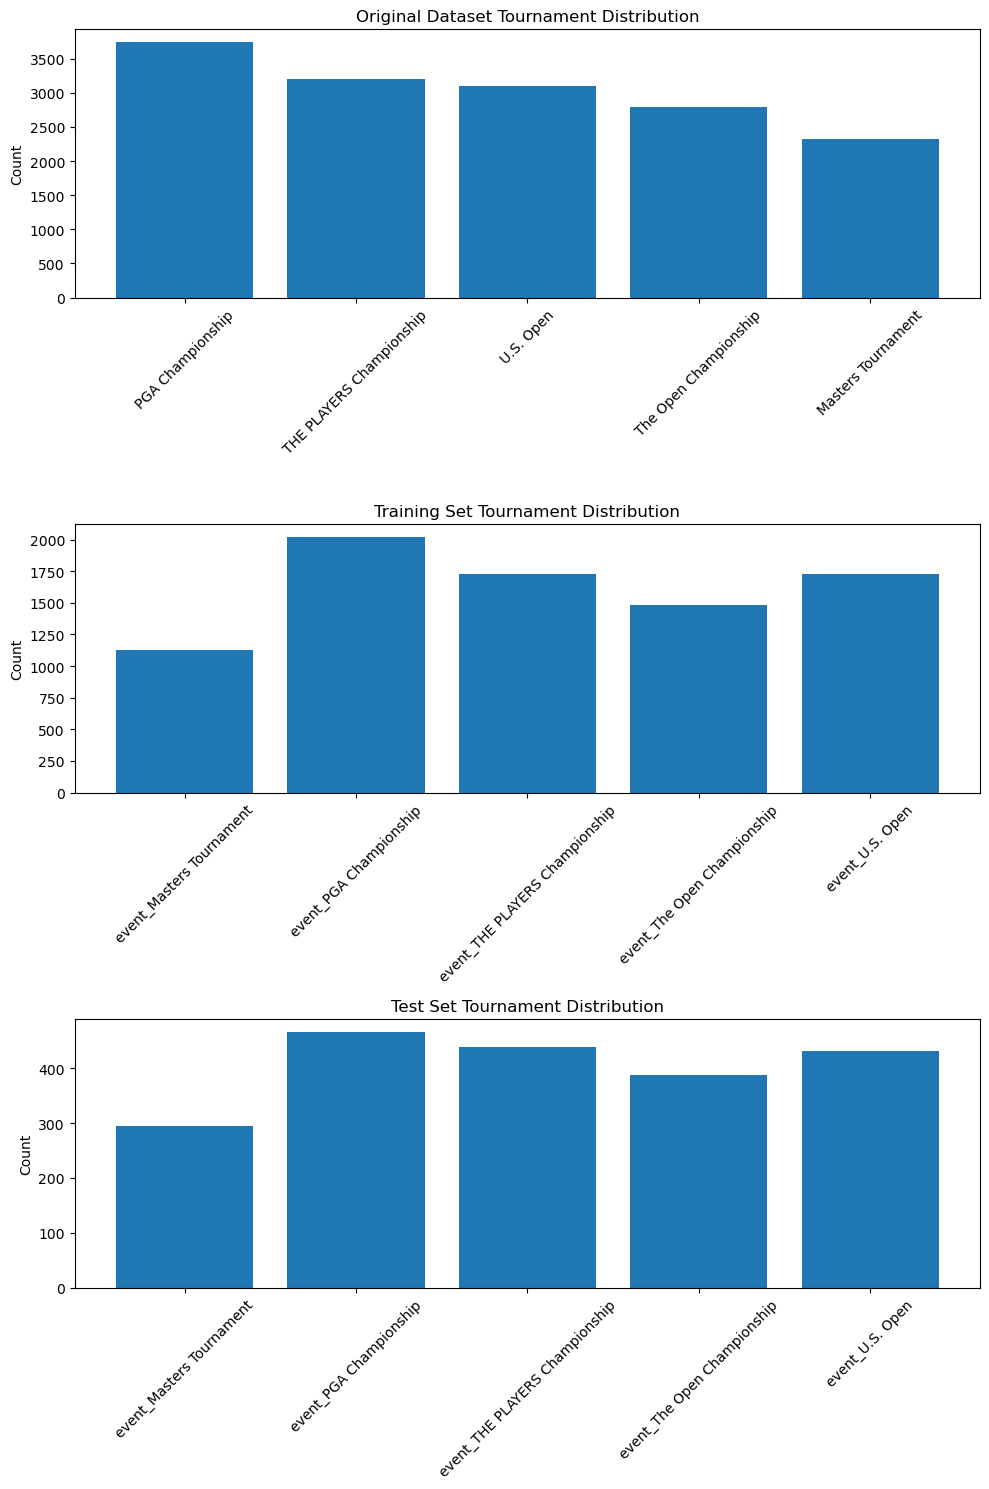

In [205]:
original_distribution = pgadata['event_name'].value_counts()
# Calculate the distribution of tournaments in the training set
training_distribution = X_train[expected_event_columns].sum()

# Calculate the distribution of tournaments in the test set
test_distribution = X_test[expected_event_columns].sum()


# Plot the distributions
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].bar(original_distribution.index, original_distribution.values)
axs[0].set_title('Original Dataset Tournament Distribution')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(training_distribution.index, training_distribution.values)
axs[1].set_title('Training Set Tournament Distribution')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

axs[2].bar(test_distribution.index, test_distribution.values)
axs[2].set_title('Test Set Tournament Distribution')
axs[2].set_ylabel('Count')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Things to note

* I wanted to check the distribution of tournaments included in my train and test sets and compared them to the original dataset
* Looking at the train and test sets, there seems to be a proportionate amount of each tournament included in both sets
* The Masters is known as the most exclusive based on its qualifications needed and so it makes sense that it is the lowest population in our dataset

# 4. Confusion Matrix and Evaluation
<a id="confusion-matrix-and-evlauation"></a>

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the CSV files into dictionaries
player_names_df = pd.read_csv('player_names.csv')
dg_id_to_name = dict(zip(player_names_df['dg_id'], player_names_df['player_name']))

tournament_names_df = pd.read_csv('tournament_names.csv')
event_to_tournament = dict(zip(tournament_names_df['event'], tournament_names_df['tournament_name']))
tournament_to_event = dict(zip(tournament_names_df['tournament_name'], tournament_names_df['event']))

# Step 1: Drop highly correlated features if they exist
columns_to_drop = ['score to par', 'sg_total']
df1_cleaned = df1.drop(columns=[col for col in columns_to_drop if col in df1.columns])

# Step 2: Encode categorical variables
df_encoded = pd.get_dummies(df1_cleaned, drop_first=False)

# Identify expected tournament dummy variables
expected_event_columns = ['event_Masters Tournament', 'event_PGA Championship', 'event_THE PLAYERS Championship', 'event_The Open Championship', 'event_U.S. Open']

# Ensure all expected event columns are present
for col in expected_event_columns:
    if col not in df_encoded.columns:
        df_encoded[col] = 0

# Create a binary target variable for making the cut (assuming 'made_weekend' is the indicator)
df_encoded['made_cut'] = df_encoded['made_weekend']

# Prepare data for the classification model
X_class = df_encoded.drop(['round_score', 'made_weekend', 'made_cut'], axis=1)
y_class = df_encoded['made_cut']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Step 3: Create a pipeline with an imputer and logistic regression for classification
pipeline_class = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # You can change 'mean' to 'median' or 'most_frequent'
    ('classifier', LogisticRegression(max_iter=1000))
])

# Step 4: Fit the classification model
pipeline_class.fit(X_train_class, y_train_class)

# Step 5: Make predictions for making the cut
y_pred_class = pipeline_class.predict(X_test_class)

# Evaluate the classification model
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
class_report = classification_report(y_test_class, y_pred_class)

print("Classification Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Use the classification model to predict who makes the cut on the entire dataset
df_encoded['predicted_made_cut'] = pipeline_class.predict(X_class)

# Filter the data to include only those who made the cut
df_made_cut = df_encoded[df_encoded['predicted_made_cut'] == 1]

# Prepare data for the linear regression model to predict scores
X_reg = df_made_cut.drop(['round_score', 'made_weekend', 'made_cut', 'predicted_made_cut'], axis=1)
y_reg = df_made_cut['round_score']

# Split the data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Step 6: Create a pipeline with an imputer and linear regression
pipeline_reg = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # You can change 'mean' to 'median' or 'most_frequent'
    ('regressor', LinearRegression())
])

# Step 7: Fit the linear regression model
pipeline_reg.fit(X_train_reg, y_train_reg)

# Step 8: Make predictions for scores
y_pred_reg = pipeline_reg.predict(X_test_reg)

# Evaluate the regression model
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

print("Regression Mean Squared Error:", mse_reg)
print("Regression R-squared:", r2_reg)

# Predict scores for players who made the cut
df_made_cut['predicted_score'] = pipeline_reg.predict(X_reg)



Classification Accuracy: 0.7305596830113917
Confusion Matrix:
 [[669 306]
 [238 806]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71       975
           1       0.72      0.77      0.75      1044

    accuracy                           0.73      2019
   macro avg       0.73      0.73      0.73      2019
weighted avg       0.73      0.73      0.73      2019

Regression Mean Squared Error: 3.638216354028099
Regression R-squared: 0.5408345188569122


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/c_/r__ycd6n73xg580m_mtq54gr0000gn/T/ipykernel_16771/888809210.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_made_cut['predicted_score'] = pipeline_reg.predict(X_reg)


* My model has an accuracy of 73.1% based on the matrix
* There seems to be a good amount positive predictions that were correct but the regression r-squared value of 0.54 means that there is definitely room for improvement
* There is a recall score of 0.77 for predicting players who made the cut however there are incorrect guesses for these as well due to a precision score of 0.72.


# 5. Conclusion and Next Steps
<a id="conclusion-and-next-steps"></a>
* I will aim to create an updated dataframe to calculate aggregated score to par. Tournament scoring is done with an aggregated score over 4 days.
* To explain, based on the data from the 2000 U.S. Open, Tiger Woods, shot rounds of -6, -2, 0, and -4 on his final round on the way to a record setting double-digit win at -12 under par.
* By creating this updated dataset, a new target variable can be utilized and I can perhaps utilize both models to predict at the round level, predict who makes the cut, and out of that set, predict the final winner come Sunday.